# UNDERSTANDING ARTIFICIAL INTELLIGENCE
### COMPONENT 2

### IMPORT LIBRARIES

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib

### DATA DOWNLOAD

In [103]:
data_dir ='./vehicles_images'
test_dir ='./images'
batch_size =32
img_height =160
img_width =160


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset= "training",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset= "validation",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    validation_split=0.8,
    subset= "validation",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size)


Found 4318 files belonging to 4 classes.
Using 3455 files for training.
Found 4318 files belonging to 4 classes.
Using 863 files for validation.
Found 20 files belonging to 4 classes.
Using 16 files for validation.


###### SHOW IMAGE SAMPLE FROM DATASET

(32, 160, 160, 3)
(32,)


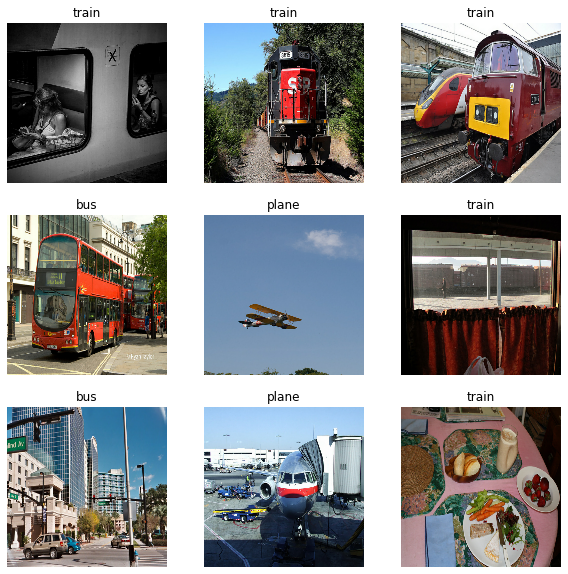

In [104]:
plt.figure(figsize = (10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
        
for image_batch, labels_batch in train_ds:
    print (image_batch.shape)
    print(labels_batch.shape)
    break

##### AUTOTUNE DATASET FOR PERFORMANCE

In [105]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer =layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x,y : (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

num_classes = 4

0.0 1.0


##### DATA NORMALIZATION (CNN WITH 5 LAYERS USING MAXPOOLING2D)

In [106]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape =(img_height, img_width, 3)),
    layers.Conv2D(16,3,padding ='same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding ='same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding ='same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,padding ='same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256,3,padding ='same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation ='relu'),
    layers.Dense(num_classes)
    
])

model.compile(optimizer ='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_12 (Rescaling)    (None, 160, 160, 3)       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 160, 160, 16)      448       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 80, 80, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 80, 80, 32)        4640      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 40, 40, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 40, 40, 64)       

In [107]:
%%time
epochs =10
history = model.fit(
    train_ds,
    validation_data =val_ds,
    epochs =epochs
)

acc =history.history['accuracy']
val_acc = history.history['val_accuracy']

loss =history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

Epoch 1/10
108/108 [==============================] - 49s 432ms/step - loss: 1.2595 - accuracy: 0.4107 - val_loss: 1.1123 - val_accuracy: 0.5145
Epoch 2/10
108/108 [==============================] - 44s 406ms/step - loss: 1.0877 - accuracy: 0.5369 - val_loss: 1.0122 - val_accuracy: 0.5724
Epoch 3/10
108/108 [==============================] - 44s 410ms/step - loss: 0.9810 - accuracy: 0.6003 - val_loss: 1.0513 - val_accuracy: 0.5747
Epoch 4/10
108/108 [==============================] - 45s 415ms/step - loss: 0.9269 - accuracy: 0.6295 - val_loss: 0.9136 - val_accuracy: 0.6315
Epoch 5/10
108/108 [==============================] - 46s 428ms/step - loss: 0.8442 - accuracy: 0.6619 - val_loss: 0.9015 - val_accuracy: 0.6466
Epoch 6/10
108/108 [==============================] - 47s 431ms/step - loss: 0.7722 - accuracy: 0.7010 - val_loss: 0.8933 - val_accuracy: 0.6466
Epoch 7/10
108/108 [==============================] - 44s 406ms/step - loss: 0.7020 - accuracy: 0.7360 - val_loss: 1.0566 - val_ac

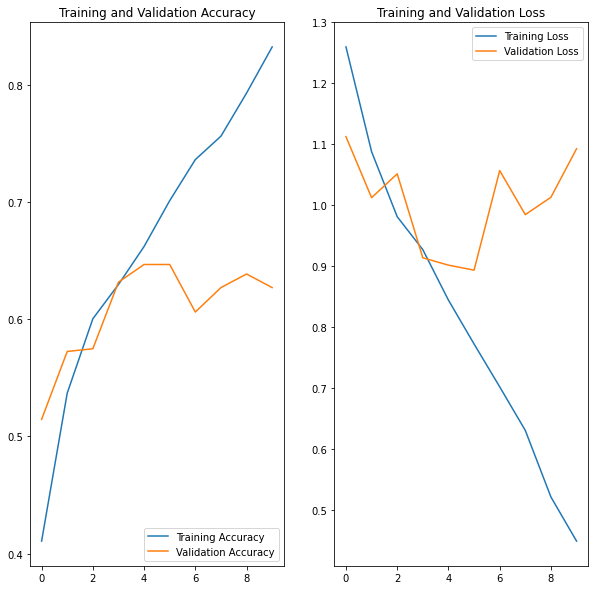

In [108]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc ='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label ='Validation Loss')
plt.legend(loc ='upper right')
plt.title('Training and Validation Loss')

plt.show()

##### DATA AUGMENTATION

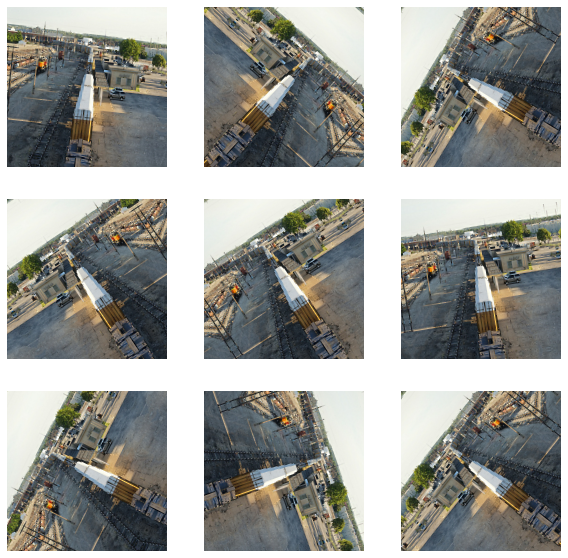

In [109]:
data_augmentation =tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

for image,_ in train_ds.take(1):
    plt.figure(figsize =(10,10))
    first_image =image[0]
    for i in range(9):
        ax= plt.subplot(3,3,i + 1)
        augmented_image =data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

##### FEATURE EXTRACTION

In [110]:
batch_size =32

image_size=(160,160)

IMG_SHAPE = image_size + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape = IMG_SHAPE,
                                              include_top =False,
                                              weights ='imagenet')
image_batch, label_batch =next(iter(train_ds))
#image_batch, label_batch =next(iter(test_ds))

feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


##### FREEZING & CREATING BASE MODEL

In [111]:
base_model.trainable = False
base_model.summary()

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average =global_average_layer(feature_batch)
print (feature_batch_average.shape)

prediction_layer = tf.keras.layers.Dense(3)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_9[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [112]:
prediction_layer = tf.keras.layers.Dense(4)
prediction_batch = prediction_layer(feature_batch_average)
print (prediction_batch.shape)

(32, 4)


In [113]:
preprocess_input =tf.keras.applications.mobilenet_v2.preprocess_input

In [114]:
%%time
inputs =tf.keras.Input(shape =(160,160,3))
x=data_augmentation(inputs)
x=preprocess_input(x)
x=base_model(x,training = False)
x=global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs =prediction_layer(x)
model=tf.keras.Model(inputs, outputs)

base_learning_rate = 0.001
model.compile(optimizer =tf.keras.optimizers.Adam(lr=base_learning_rate),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.summary()

len(model.trainable_variables)

initial_epochs = 10

loss0, accuracy0 = model.evaluate(val_ds)

print('initial loss: {:.2f}'.format(loss0))
print('initial accuracy: {:.2f}'.format(accuracy0))

history = model.fit(train_ds,
                   epochs=initial_epochs,
                   validation_data =val_ds)



Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 160, 160, 3)]     0         
                                                                 
 sequential_9 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv_3 (TFOpLamb  (None, 160, 160, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_3 (TFOpLam  (None, 160, 160, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                           

In [115]:
%%time
epochs =10
history = model.fit(
    train_ds,
    validation_data =val_ds,
    epochs =epochs
)

acc =history.history['accuracy']
val_acc = history.history['val_accuracy']

loss =history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

Epoch 1/10
108/108 [==============================] - 54s 495ms/step - loss: 0.5351 - accuracy: 0.7904 - val_loss: 0.5037 - val_accuracy: 0.8169
Epoch 2/10
108/108 [==============================] - 47s 440ms/step - loss: 0.5266 - accuracy: 0.7997 - val_loss: 0.4946 - val_accuracy: 0.8250
Epoch 3/10
108/108 [==============================] - 49s 458ms/step - loss: 0.5281 - accuracy: 0.7902 - val_loss: 0.4894 - val_accuracy: 0.8204
Epoch 4/10
108/108 [==============================] - 50s 463ms/step - loss: 0.5145 - accuracy: 0.7994 - val_loss: 0.4994 - val_accuracy: 0.8227
Epoch 5/10
108/108 [==============================] - 47s 436ms/step - loss: 0.5214 - accuracy: 0.8017 - val_loss: 0.5069 - val_accuracy: 0.8146
Epoch 6/10
108/108 [==============================] - 47s 433ms/step - loss: 0.5148 - accuracy: 0.8012 - val_loss: 0.4942 - val_accuracy: 0.8216
Epoch 7/10
108/108 [==============================] - 44s 411ms/step - loss: 0.4938 - accuracy: 0.8093 - val_loss: 0.4964 - val_ac

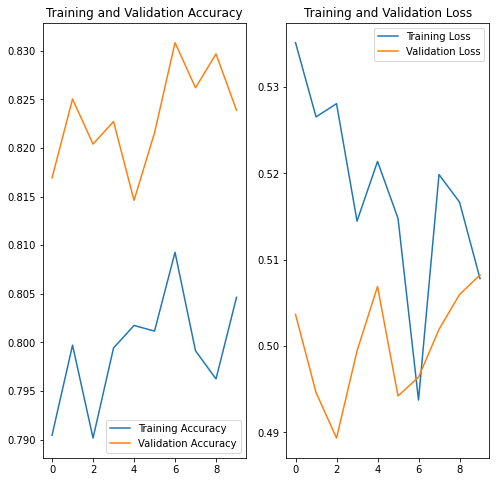

In [116]:
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc ='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label ='Validation Loss')
plt.legend(loc ='upper right')
plt.title('Training and Validation Loss')

plt.show()

###### FINE TUNING MODEL WEIGHT FROM PRETRAINED MODEL

In [117]:
base_model.trainiable = True
base_model.summary()

#checking number of layers in the base model
print('Number of layers in the base model:', len(base_model.layers))

#fine tune from this layer onwards
fine_tune_at = 100

#freeze all the layers before the 'fine tune at' layer.
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_9[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [118]:
base_learning_rate =0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [119]:
%%time

initial_epochs = 10
fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs =total_epochs,
                        initial_epoch = history.epoch[-1],
                        validation_data = val_ds)

Epoch 10/20
108/108 [==============================] - 51s 443ms/step - loss: 0.4689 - accuracy: 0.8179 - val_loss: 0.5094 - val_accuracy: 0.8216
Epoch 11/20
108/108 [==============================] - 46s 427ms/step - loss: 0.4835 - accuracy: 0.8110 - val_loss: 0.5095 - val_accuracy: 0.8216
Epoch 12/20
108/108 [==============================] - 48s 448ms/step - loss: 0.4725 - accuracy: 0.8214 - val_loss: 0.5105 - val_accuracy: 0.8204
Epoch 13/20
108/108 [==============================] - 47s 439ms/step - loss: 0.4714 - accuracy: 0.8208 - val_loss: 0.5104 - val_accuracy: 0.8192
Epoch 14/20
108/108 [==============================] - 52s 487ms/step - loss: 0.4843 - accuracy: 0.8159 - val_loss: 0.5093 - val_accuracy: 0.8216
Epoch 15/20
108/108 [==============================] - 65s 604ms/step - loss: 0.4868 - accuracy: 0.8081 - val_loss: 0.5098 - val_accuracy: 0.8204
Epoch 16/20
108/108 [==============================] - 90s 834ms/step - loss: 0.4853 - accuracy: 0.8087 - val_loss: 0.5103 -

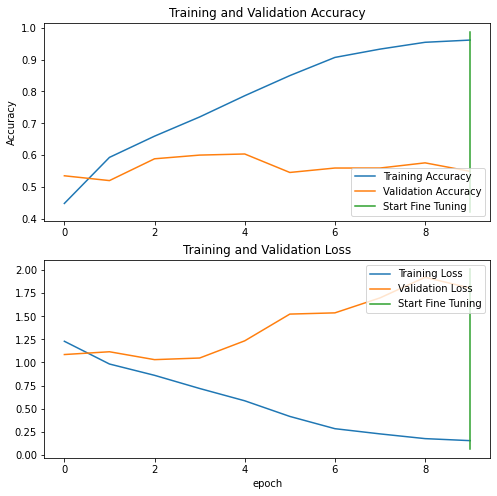

In [129]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.plot([initial_epochs-1, initial_epochs-1],
         plt.ylim(), label="Start Fine Tuning")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
#plt.ylabel('Cross Entropy')
plt.plot([initial_epochs-1, initial_epochs-1],
         plt.ylim(), label="Start Fine Tuning")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### EVALUATING THE MODEL

In [127]:
loss, accuracy = model.evaluate(test_ds)
print('Test accuracy:', accuracy)

1/1 [==============================] - 0s 193ms/step - loss: 1.0577 - accuracy: 0.7500
Test accuracy: 0.75


Predictions:
 [0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1
 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1]
Labels:
 [3 1 1 3 2 2 0 0 1 3 3 0 1 2 2 0]


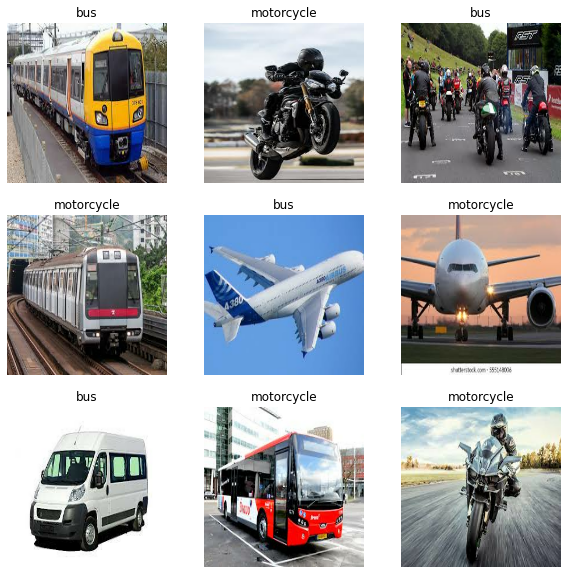

In [137]:
#code from https://www.tensorflow.org/tutorials/images/transfer_learning#evaluation_and_prediction

# Retrieve a batch of images from the test set
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a relu to our model.
predictions = tf.nn.relu(predictions)
predictions = tf.where(predictions < 0.5, 0,1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

### TRADE OFF BETWEEN USING MANY LAYERS

##### CNN WITH 4 LAYERS USING MAXPOOLING2D

In [135]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape =(img_height, img_width, 3)),
    layers.Conv2D(16,3,padding ='same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding ='same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding ='same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,padding ='same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation ='relu'),
    layers.Dense(num_classes)
    
])

model.compile(optimizer ='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_15 (Rescaling)    (None, 160, 160, 3)       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 160, 160, 16)      448       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 80, 80, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 80, 80, 32)        4640      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 40, 40, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 40, 40, 64)      

In [136]:
%%time
epochs =10
history = model.fit(
    train_ds,
    validation_data =val_ds,
    epochs =epochs
)

acc =history.history['accuracy']
val_acc = history.history['val_accuracy']

loss =history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

Epoch 1/10
108/108 [==============================] - 44s 400ms/step - loss: 1.2353 - accuracy: 0.4220 - val_loss: 1.0896 - val_accuracy: 0.5377
Epoch 2/10
108/108 [==============================] - 45s 412ms/step - loss: 1.0567 - accuracy: 0.5543 - val_loss: 0.9917 - val_accuracy: 0.5875
Epoch 3/10
108/108 [==============================] - 45s 417ms/step - loss: 0.9676 - accuracy: 0.6107 - val_loss: 0.9482 - val_accuracy: 0.6280
Epoch 4/10
108/108 [==============================] - 45s 421ms/step - loss: 0.8870 - accuracy: 0.6385 - val_loss: 0.9364 - val_accuracy: 0.6454
Epoch 5/10
108/108 [==============================] - 45s 421ms/step - loss: 0.7961 - accuracy: 0.6836 - val_loss: 0.8967 - val_accuracy: 0.6501
Epoch 6/10
108/108 [==============================] - 47s 434ms/step - loss: 0.7065 - accuracy: 0.7207 - val_loss: 0.9093 - val_accuracy: 0.6454
Epoch 7/10
108/108 [==============================] - 47s 433ms/step - loss: 0.6085 - accuracy: 0.7685 - val_loss: 1.0143 - val_ac

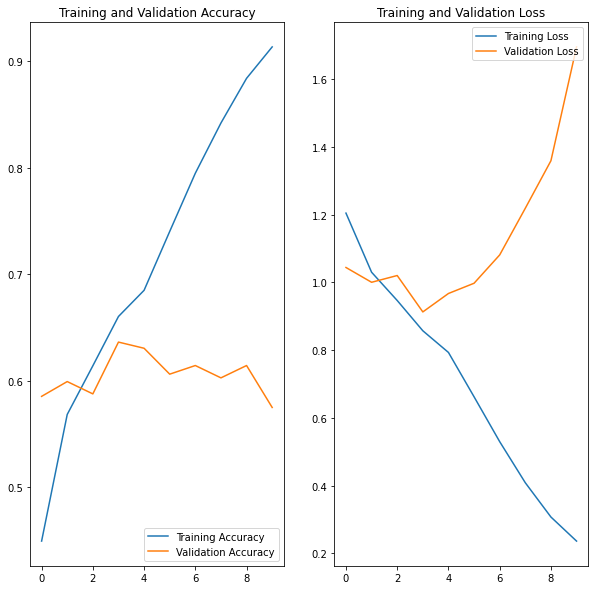

In [46]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc ='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label ='Validation Loss')
plt.legend(loc ='upper right')
plt.title('Training and Validation Loss')

plt.show()

##### CNN WITH 3 LAYERS USING MAXPOOLING2D

In [132]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape =(img_height, img_width, 3)),
    layers.Conv2D(16,3,padding ='same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding ='same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding ='same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation ='relu'),
    layers.Dense(num_classes)
    
])

model.compile(optimizer ='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_14 (Rescaling)    (None, 160, 160, 3)       0         
                                                                 
 conv2d_33 (Conv2D)          (None, 160, 160, 16)      448       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 80, 80, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 80, 80, 32)        4640      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 40, 40, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 40, 40, 64)      

In [133]:
%%time
epochs =10
history = model.fit(
    train_ds,
    validation_data =val_ds,
    epochs =epochs
)

acc =history.history['accuracy']
val_acc = history.history['val_accuracy']

loss =history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

Epoch 1/10
108/108 [==============================] - 44s 404ms/step - loss: 1.2867 - accuracy: 0.4156 - val_loss: 1.0975 - val_accuracy: 0.5295
Epoch 2/10
108/108 [==============================] - 43s 397ms/step - loss: 1.0218 - accuracy: 0.5754 - val_loss: 0.9800 - val_accuracy: 0.5933
Epoch 3/10
108/108 [==============================] - 42s 389ms/step - loss: 0.9003 - accuracy: 0.6420 - val_loss: 0.9666 - val_accuracy: 0.6130
Epoch 4/10
108/108 [==============================] - 41s 382ms/step - loss: 0.7964 - accuracy: 0.6871 - val_loss: 0.9728 - val_accuracy: 0.6130
Epoch 5/10
108/108 [==============================] - 41s 383ms/step - loss: 0.6502 - accuracy: 0.7586 - val_loss: 1.0293 - val_accuracy: 0.6141
Epoch 6/10
108/108 [==============================] - 42s 385ms/step - loss: 0.5103 - accuracy: 0.8078 - val_loss: 1.1779 - val_accuracy: 0.5968
Epoch 7/10
108/108 [==============================] - 42s 386ms/step - loss: 0.3582 - accuracy: 0.8758 - val_loss: 1.3904 - val_ac

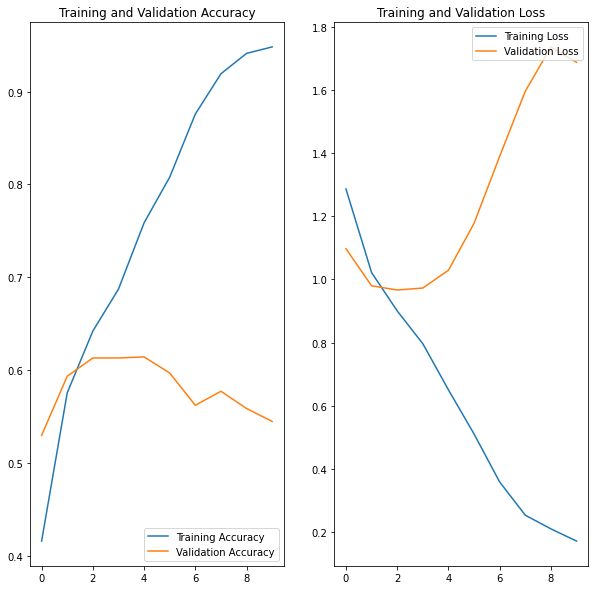

In [134]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc ='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label ='Validation Loss')
plt.legend(loc ='upper right')
plt.title('Training and Validation Loss')

plt.show()

##### CNN WITH 3 LAYERS USING AVERAGEPOOLING2D

In [50]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape =(img_height, img_width, 3)),
    layers.Conv2D(16,3,padding ='same', activation ='relu'),
    layers.AveragePooling2D(),
    layers.Conv2D(32,3,padding ='same', activation ='relu'),
    layers.AveragePooling2D(),
    layers.Conv2D(64,3,padding ='same', activation ='relu'),
    layers.AveragePooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation ='relu'),
    layers.Dense(num_classes)
    
])

model.compile(optimizer ='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 160, 160, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 160, 160, 16)      448       
                                                                 
 average_pooling2d_5 (Averag  (None, 80, 80, 16)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_13 (Conv2D)          (None, 80, 80, 32)        4640      
                                                                 
 average_pooling2d_6 (Averag  (None, 40, 40, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_14 (Conv2D)          (None, 40, 40, 64)       

In [51]:
%%time
epochs =10
history = model.fit(
    train_ds,
    validation_data =val_ds,
    epochs =epochs
)

acc =history.history['accuracy']
val_acc = history.history['val_accuracy']

loss =history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

Epoch 1/10
108/108 [==============================] - 39s 337ms/step - loss: 1.2412 - accuracy: 0.4368 - val_loss: 1.2421 - val_accuracy: 0.4206
Epoch 2/10
108/108 [==============================] - 39s 360ms/step - loss: 1.0746 - accuracy: 0.5300 - val_loss: 1.0142 - val_accuracy: 0.5713
Epoch 3/10
108/108 [==============================] - 38s 344ms/step - loss: 0.9655 - accuracy: 0.6017 - val_loss: 1.0016 - val_accuracy: 0.5898
Epoch 4/10
108/108 [==============================] - 37s 335ms/step - loss: 0.9044 - accuracy: 0.6397 - val_loss: 1.1225 - val_accuracy: 0.5423
Epoch 5/10
108/108 [==============================] - 37s 338ms/step - loss: 0.8240 - accuracy: 0.6651 - val_loss: 1.0505 - val_accuracy: 0.5469
Epoch 6/10
108/108 [==============================] - 38s 346ms/step - loss: 0.7235 - accuracy: 0.7123 - val_loss: 1.0961 - val_accuracy: 0.5805
Epoch 7/10
108/108 [==============================] - 37s 340ms/step - loss: 0.5758 - accuracy: 0.7815 - val_loss: 1.0735 - val_ac

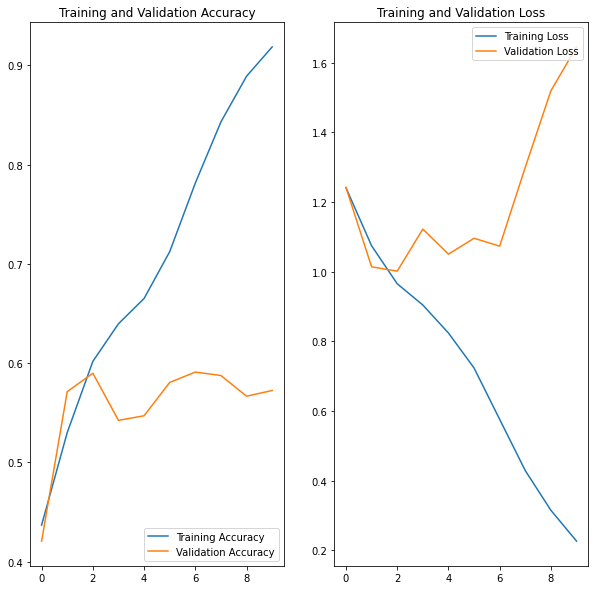

In [52]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc ='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label ='Validation Loss')
plt.legend(loc ='upper right')
plt.title('Training and Validation Loss')

plt.show()

##### CNN WITH 4 LAYERS USING AVERAGEPOOLING2D

In [53]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape =(img_height, img_width, 3)),
    layers.Conv2D(16,3,padding ='same', activation ='relu'),
    layers.AveragePooling2D(),
    layers.Conv2D(32,3,padding ='same', activation ='relu'),
    layers.AveragePooling2D(),
    layers.Conv2D(64,3,padding ='same', activation ='relu'),
    layers.AveragePooling2D(),
    layers.Conv2D(128,3,padding ='same', activation ='relu'),
    layers.AveragePooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation ='relu'),
    layers.Dense(num_classes)
    
])

model.compile(optimizer ='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 160, 160, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 160, 160, 16)      448       
                                                                 
 average_pooling2d_8 (Averag  (None, 80, 80, 16)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_16 (Conv2D)          (None, 80, 80, 32)        4640      
                                                                 
 average_pooling2d_9 (Averag  (None, 40, 40, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_17 (Conv2D)          (None, 40, 40, 64)       

In [54]:
%%time
epochs =10
history = model.fit(
    train_ds,
    validation_data =val_ds,
    epochs =epochs
)

acc =history.history['accuracy']
val_acc = history.history['val_accuracy']

loss =history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

Epoch 1/10
108/108 [==============================] - 45s 407ms/step - loss: 1.2144 - accuracy: 0.4382 - val_loss: 1.0883 - val_accuracy: 0.5411
Epoch 2/10
108/108 [==============================] - 43s 396ms/step - loss: 1.0469 - accuracy: 0.5572 - val_loss: 1.1084 - val_accuracy: 0.5295
Epoch 3/10
108/108 [==============================] - 44s 405ms/step - loss: 0.9905 - accuracy: 0.5971 - val_loss: 0.9866 - val_accuracy: 0.5956
Epoch 4/10
108/108 [==============================] - 43s 398ms/step - loss: 0.9380 - accuracy: 0.6159 - val_loss: 1.0001 - val_accuracy: 0.5968
Epoch 5/10
108/108 [==============================] - 43s 396ms/step - loss: 0.8616 - accuracy: 0.6480 - val_loss: 0.9728 - val_accuracy: 0.6060
Epoch 6/10
108/108 [==============================] - 44s 403ms/step - loss: 0.7910 - accuracy: 0.6929 - val_loss: 0.9236 - val_accuracy: 0.6419
Epoch 7/10
108/108 [==============================] - 43s 397ms/step - loss: 0.7372 - accuracy: 0.7065 - val_loss: 0.9995 - val_ac

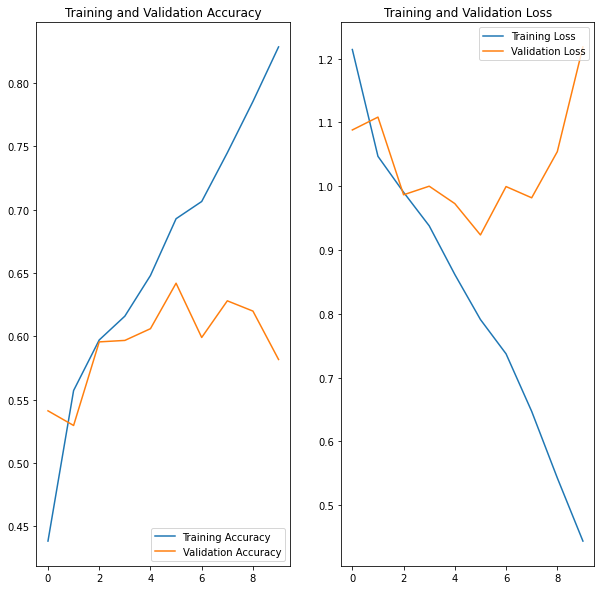

In [55]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc ='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label ='Validation Loss')
plt.legend(loc ='upper right')
plt.title('Training and Validation Loss')

plt.show()

##### CNN WITH 5 LAYERS USING AVERAGEPOOLING2D

In [56]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape =(img_height, img_width, 3)),
    layers.Conv2D(16,3,padding ='same', activation ='relu'),
    layers.AveragePooling2D(),
    layers.Conv2D(32,3,padding ='same', activation ='relu'),
    layers.AveragePooling2D(),
    layers.Conv2D(64,3,padding ='same', activation ='relu'),
    layers.AveragePooling2D(),
    layers.Conv2D(128,3,padding ='same', activation ='relu'),
    layers.AveragePooling2D(),
    layers.Conv2D(256,3,padding ='same', activation ='relu'),
    layers.AveragePooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation ='relu'),
    layers.Dense(num_classes)
    
])

model.compile(optimizer ='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 160, 160, 3)       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 160, 160, 16)      448       
                                                                 
 average_pooling2d_12 (Avera  (None, 80, 80, 16)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_20 (Conv2D)          (None, 80, 80, 32)        4640      
                                                                 
 average_pooling2d_13 (Avera  (None, 40, 40, 32)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_21 (Conv2D)          (None, 40, 40, 64)       

In [57]:
%%time
epochs =10
history = model.fit(
    train_ds,
    validation_data =val_ds,
    epochs =epochs
)

acc =history.history['accuracy']
val_acc = history.history['val_accuracy']

loss =history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

Epoch 1/10
108/108 [==============================] - 47s 432ms/step - loss: 1.2794 - accuracy: 0.3977 - val_loss: 1.2137 - val_accuracy: 0.4554
Epoch 2/10
108/108 [==============================] - 45s 413ms/step - loss: 1.1771 - accuracy: 0.4614 - val_loss: 1.1178 - val_accuracy: 0.5122
Epoch 3/10
108/108 [==============================] - 44s 409ms/step - loss: 1.1137 - accuracy: 0.5065 - val_loss: 1.0399 - val_accuracy: 0.5516
Epoch 4/10
108/108 [==============================] - 45s 410ms/step - loss: 1.0333 - accuracy: 0.5638 - val_loss: 1.0014 - val_accuracy: 0.5829
Epoch 5/10
108/108 [==============================] - 45s 412ms/step - loss: 0.9901 - accuracy: 0.5884 - val_loss: 1.0104 - val_accuracy: 0.5898
Epoch 6/10
108/108 [==============================] - 45s 413ms/step - loss: 0.9336 - accuracy: 0.6240 - val_loss: 1.0675 - val_accuracy: 0.5574
Epoch 7/10
108/108 [==============================] - 46s 424ms/step - loss: 0.9360 - accuracy: 0.6165 - val_loss: 0.9856 - val_ac

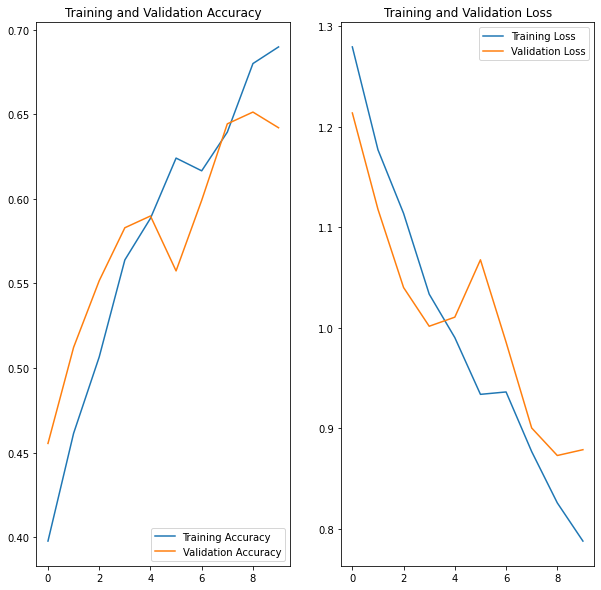

In [58]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc ='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label ='Validation Loss')
plt.legend(loc ='upper right')
plt.title('Training and Validation Loss')

plt.show()